# **Task C1** 
## Analyzing the Avocado Data

##### This task uses the avocado dataset. The dataset contains historical data on avocado prices and sales volume in multiple U.S. markets. One of the columns in this dataset, Unnamed: 0, contains sequential numbers that are irrelevant to analyzing this data. Three of the other columns contain sales for PLU (price look-up) codes 4046, 4225, and 4770. These columns will not be used in this task. If you review the data, you’ll see that some of the regions overlap. For example, one of the regions is the entire U.S., and all of the other regions are parts of the U.S. Because of that, you would need to review this data carefully before determining the best way to analyze it. For the purposes of this task though, the overlapping regions won’t be taken into consideration.

##### https://www.kaggle.com/neuromusic/avocado-prices

<img src="avocado-logo.png" alt="SIT112 Avocado!" width="1800" height="200">




### A. Instructions

1. Make sure you have completed Task P1 before working on this task. 
2. Complete the task based on the comments and hints provided in the following sections.   
3. Complete the TaskCompletionReport from. 
4. Before submission, please make sure you have executed all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
5. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution (code) as an "ipynb" file (do not zip/combine them). You can do this by the end of Week 12, but feedback will only be provided for submissions received by 11 AM on the due date. <font color="red">Please do not include the dataset in your submission. </font>
6. The workshops are the primary venue for you to seek help if you need any clarification/assitance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
7. Consider using online resources such as ChatGPT to strenghten your undertanding of the task. 

Good luck :)

### B. Write Python code that performs (answers) the following operations (questions) 

In [61]:
import pandas as pd

##### 1. Read the data from the CSV file into a DataFrame.

In [65]:
# write your code here
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### 2. Multiply the Total Volume and AveragePrice columns, and store the result in a new column called EstimatedRevenue. Then, calculate the EstimatedRevenue for each region, sort the resulting data in descending order by EstimatedRevenue, and display the top 5 regions, except TotalUS, with the highest EstimatedRevenue.

* Hint: the estimated revenue of region x = sum of the estimated revenues in region x

In [71]:

# Calculate revenue for each region
data['Total_Revenue'] = data['Total Volume'] * data['AveragePrice']

# Group data by region and sum the revenue
region_sales = data.groupby('region')['Total_Revenue'].sum()

# Exclude TotalUS region
region_sales = region_sales.drop('TotalUS')

# Get the top 5 regions by revenue
top_sales_regions = region_sales.nlargest(5)

# Display the top 5 regions
top_sales_regions


region
California      1.121414e+09
West            1.066834e+09
Northeast       9.600079e+08
SouthCentral    8.740593e+08
Southeast       7.036306e+08
Name: Total_Revenue, dtype: float64

##### 3. Create a bar plot that shows the mean, median, and standard deviation of the Total Volume of the organic avocados sold in the regions with the highest overall Total Volume from (including) 2017.

,mean,median,std
region,,,
California,164844.836308,167193.75,33361.497553
GreatLakes,178094.391538,169816.92,48354.489850
Midsouth,142198.610615,139274.81,32964.267698
Northeast,243570.227077,233976.66,99930.570938
West,235409.159692,215628.86,80717.592835


<Axes: xlabel='region'>

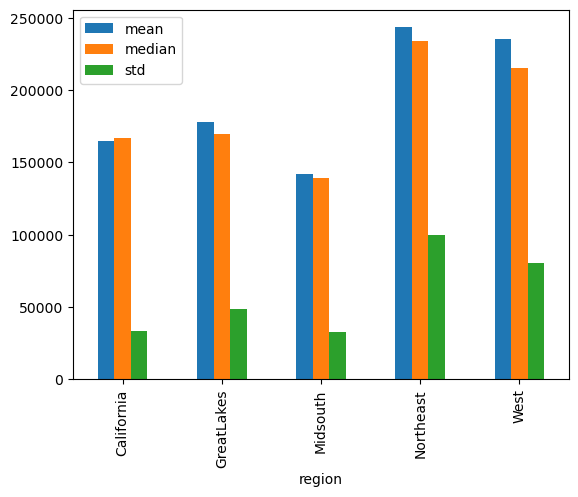

In [73]:
# Extract data for organic avocados from 2017 onwards, grouped by region (excluding TotalUS)
organic_data = data[(data['type'] == 'organic') & (data['year'] >= 2017) & (data['region'] != 'TotalUS')]
region_metrics = organic_data.groupby('region')['Total Volume'].agg(['sum', 'median', 'std'])

# Get the top 5 regions with the highest Total Volume
top_regions = region_metrics.nlargest(5, 'sum').index
top_region_data = organic_data[organic_data['region'].isin(top_regions)]

# Calculate statistics for the top regions
top_region_stats = top_region_data.groupby('region')['Total Volume'].agg(['mean', 'median', 'std'])

# Display summary statistics
display(top_region_stats.head())

# Create a bar plot to visualize the statistics
top_region_stats.plot(kind='bar', y=['mean', 'median', 'std'], rot=90)

##### 4. What is the mean and median of AveragePrice for each type of avocado (organic and conventional) in 2018? Be sure to include just the type, MeanPrice, and MedianPrice columns in the results.

In [77]:
# write your code here

avocados_2018 = data[(data['year'] == 2018) & (data['type'].isin(['organic', 'conventional']))]

# Calculate the mean and median price for each type of avocado in 2018
avocado_prices_2018 = avocados_2018.groupby('type')['AveragePrice'].agg(['mean', 'median'])

# Rename columns and reset index
avocado_prices_2018.columns = ['MeanPrice', 'MedianPrice']
avocado_prices_2018.reset_index(inplace=True)

# Display the results
avocado_prices_2018

,type,MeanPrice,MedianPrice
0,conventional,1.127886,1.14
1,organic,1.567176,1.55


##### 5. Analyze the consistency of sales for Small Bags, Large Bags, XLarge Bags, and Total Bags of the top 3 avocado producing regions (excluding TotalUS) for each type of avocado over time. 

##### *To explain consistency of sales, use the coefficient of variation, which is a statistical measure used to determine the consistency or variability of a data set. It is calculated as the ratio of the standard deviation to the mean, expressed as a percentage. Higher values of the coefficient of variation indicate greater variability or inconsistency in the data, while lower values indicate more consistency in the data.* 

In [83]:
# write your code here

# Get the top 3 regions (excluding TotalUS) with the highest sum of Total Volume
top_regions = data[data.region != 'TotalUS'].groupby('region').sum().sort_values('Total Volume', ascending=False).head(3).index.tolist()

# Get the sales of Small Bags, Large Bags, XLarge Bags, and Total Bags for each region and type of avocado
sales_by_region_type = data[data.region.isin(top_regions)].groupby(['region', 'year', 'type']).agg({'Small Bags':'sum', 'Large Bags':'sum', 'XLarge Bags':'sum', 'Total Bags':'sum'})

# Calculate the coefficient of variation for each region and bag type, by dividing the standard deviation of the bags sold by the mean number of bags sold.
cv_by_region_type = sales_by_region_type.groupby(['region', 'type']).std() / sales_by_region_type.groupby(['region', 'type']).mean()

# Display the standard deviation of sales by region and type
display(sales_by_region_type.groupby(['region', 'type']).std())

# Print the coefficient of variation results
cv_by_region_type.head()


Small Bags    Large Bags   XLarge Bags  \
region       type                                                     
California   conventional  3.218931e+07  3.248096e+06  1.108079e+06   
             organic       1.431104e+06  1.488754e+05  0.000000e+00   
SouthCentral conventional  1.999057e+07  7.474870e+06  4.828260e+05   
             organic       1.737775e+06  2.056253e+05  0.000000e+00   
West         conventional  3.388273e+07  1.893926e+07  1.112425e+05   
             organic       1.368988e+06  1.482123e+06  1.108539e+03   

                             Total Bags  
region       type                        
California   conventional  3.514518e+07  
             organic       1.560389e+06  
SouthCentral conventional  2.744378e+07  
             organic       1.910286e+06  
West         conventional  5.172745e+07  
             organic       2.723219e+06

Small Bags  Large Bags  XLarge Bags  Total Bags
region       type                                                         
California   conventional    0.583109    1.105039     0.840635    0.591069
             organic         0.690845    1.073864          NaN    0.706007
SouthCentral conventional    0.458171    0.666116     0.731524    0.494368
             organic         0.675496    0.782929          NaN    0.673768
West         conventional    0.628604    0.572329     0.536888    0.593202

### C. Learn more
* https://www.statisticshowto.com/probability-and-statistics/how-to-find-a-coefficient-of-variation/